# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

Now it should be clear for you how the logistic regression works.

In [2]:
df = pd.read_csv('../data/am_pm.csv')
print(df.dtypes)

date          object
am             int64
pm             int64
target        object
prediction    object
dtype: object


In [3]:
df.columns.values

array(['date', 'am', 'pm', 'target', 'prediction'], dtype=object)

In [4]:
df['target'] = df['target'].map({'weekend': 0, 'working_day': 1}).astype(int)
df['prediction'] = df['prediction'].map({'weekend': 0, 'working_day': 1}).astype(int)

In [5]:
X = df[['am', 'pm']]
y = df['target']


In [6]:
model = LogisticRegression(random_state=21, fit_intercept=False)
model.fit(X,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,False
,intercept_scaling,1
,class_weight,None
,random_state,21
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Обучение логистической модели

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


#### прогноз

In [8]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.5556


In [9]:
x_min, x_max = X['am'].min() - 1, X['am'].max() + 10
y_min, y_max = X['pm'].min() - 20, X['pm'].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = logreg.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['am', 'pm']))
Z = Z.reshape(xx.shape)
Z = Z.astype(float)

In [10]:
df['target'] = df['target'].map({0 : 'weekend', 1 : 'working_day'})
df['prediction'] = df['prediction'].map({0 : 'weekend', 1 : 'working_day'})

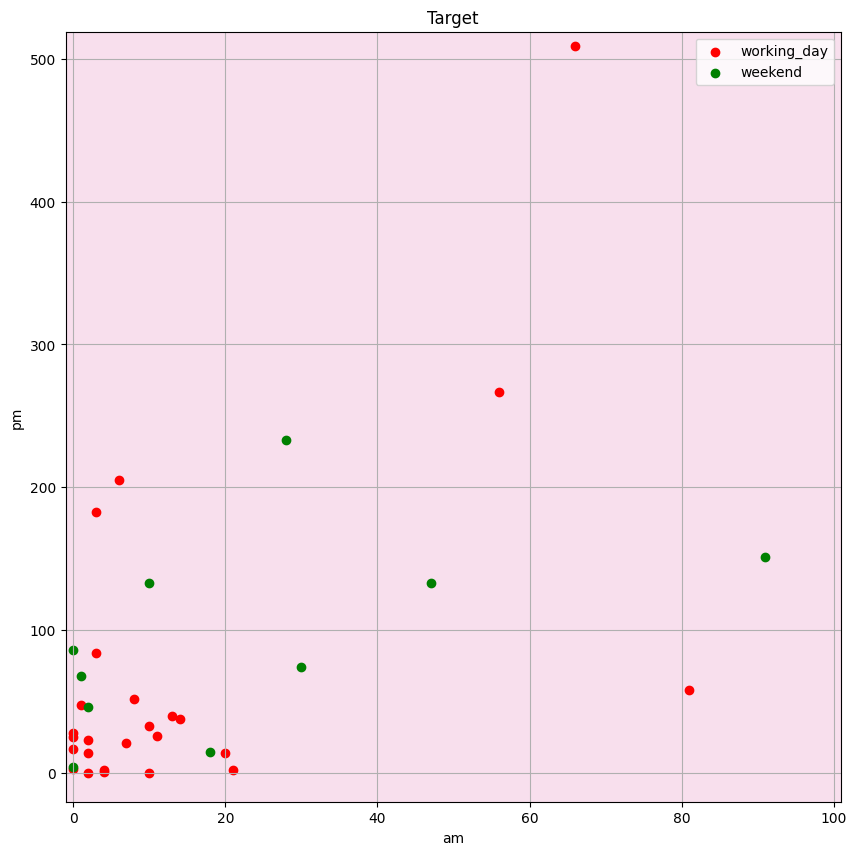

In [11]:
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='PiYG')
for target, color in [('working_day', 'red'), ('weekend', 'green')]:
    subset = df[df['target'] == target]
    plt.scatter(subset['am'], subset['pm'], c=color, label=target)
plt.xlabel('am')
plt.ylabel('pm')
plt.title('Target')
plt.legend()
plt.grid(True)
plt.show()

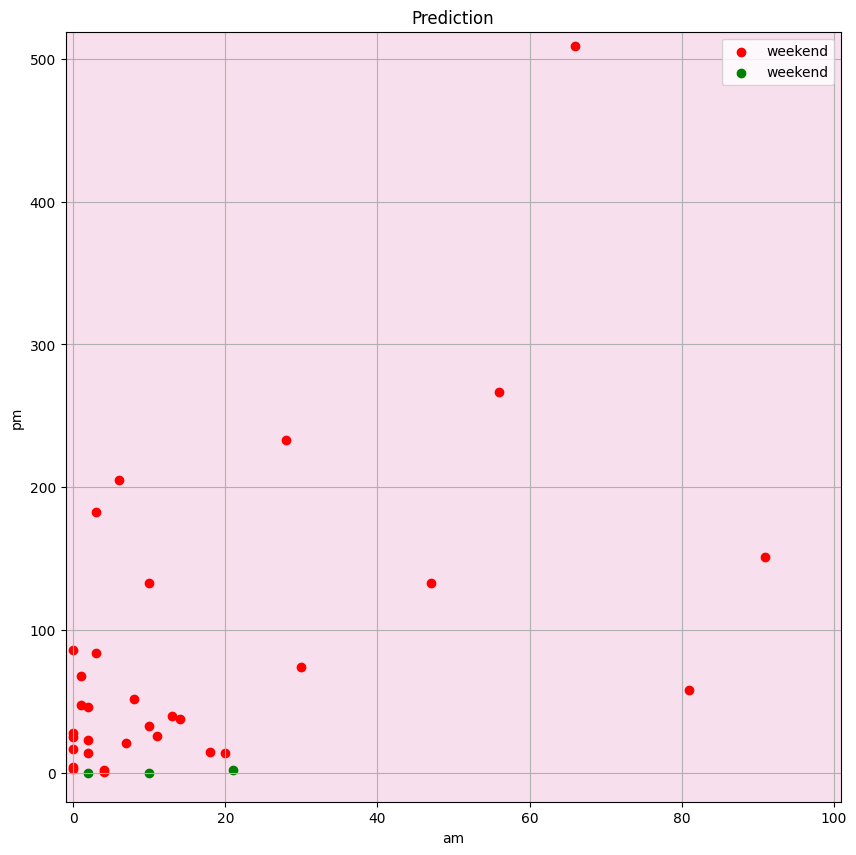

In [12]:
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='PiYG')
for prediction, color in [('working_day', 'red'), ('weekend', 'green')]:
    subset = df[df['prediction'] == prediction]
    plt.scatter(subset['am'], subset['pm'], c=color, label=target)
plt.xlabel('am')
plt.ylabel('pm')
plt.title('Prediction')
plt.legend()
plt.grid(True)
plt.show()

## 2. Standardizing and logreg


1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
logreg_scaled = LogisticRegression(random_state=21, fit_intercept=False)
logreg_scaled.fit(X_scaled, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,False
,intercept_scaling,1
,class_weight,None
,random_state,21
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [15]:
y_pred_scaled = logreg_scaled.predict(X_scaled)
model_accuracy = accuracy_score(y, y_pred_scaled)
most_common_class = df['target'].mode()[0]
naive_accuracy = accuracy_score(df['target'], [most_common_class] * len(df))

In [16]:
model_accuracy

0.7428571428571429

In [17]:
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 1].max() + 1
y_min, y_max = X_scaled[:, 0].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = logreg_scaled.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

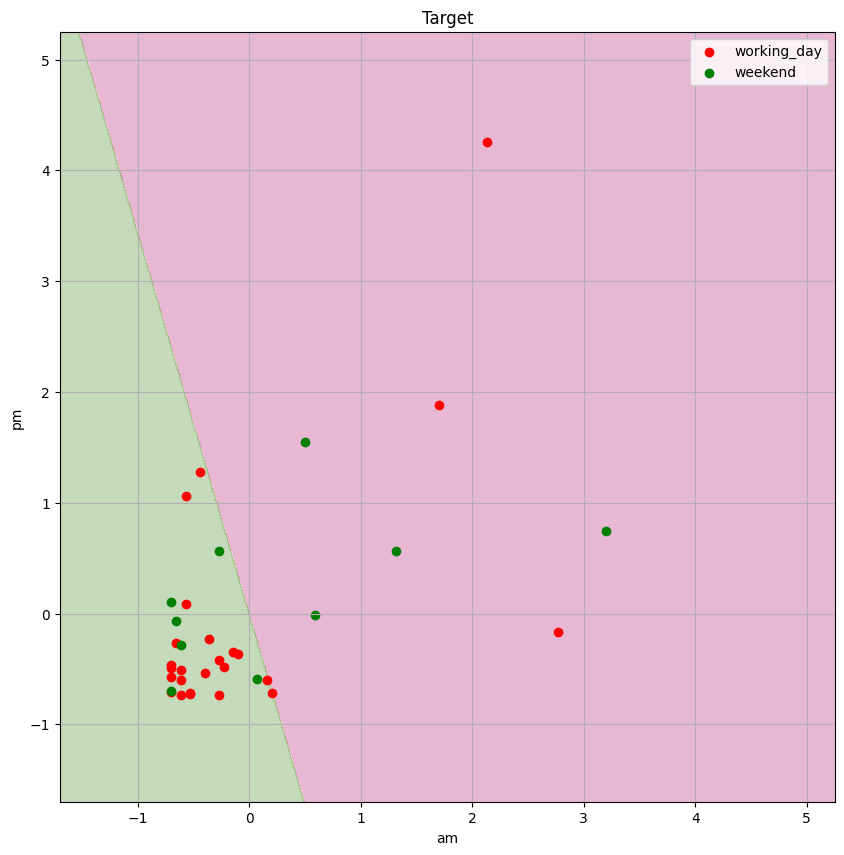

In [18]:
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='PiYG')
for target, color in [('working_day', 'red'), ('weekend', 'green')]:
    subset = df[df['target'] == target]
    plt.scatter(scaler.transform(subset[['am', 'pm']])[:, 0], scaler.transform(subset[['am', 'pm']])[:, 1], c=color, label=target)
plt.xlabel('am')
plt.ylabel('pm')
plt.title('Target')
plt.legend()
plt.grid(True)
plt.show()  

In [19]:
df['predict_scaled'] = logreg_scaled.predict(X_scaled)
df['predict_scaled'] = df['predict_scaled'].apply(lambda x: 'weekend' if x == 1 else 'working_day')

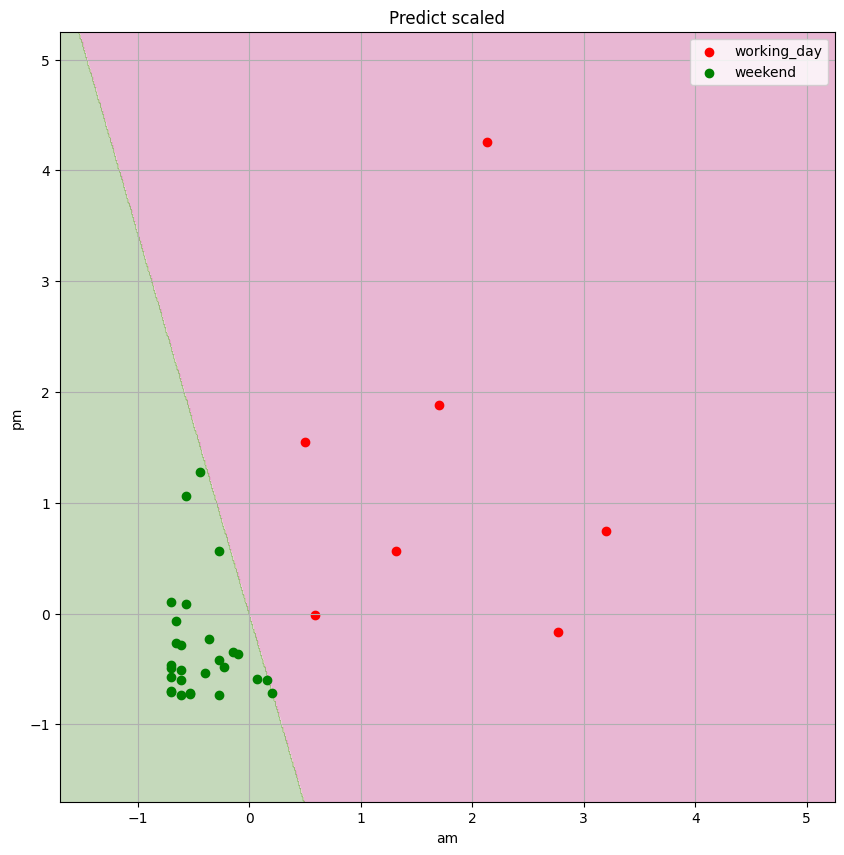

In [20]:
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='PiYG')
for predict, color in [('working_day', 'red'), ('weekend', 'green')]:
    subset = df[df['predict_scaled'] == predict]
    plt.scatter(scaler.transform(subset[['am', 'pm']])[:, 0], scaler.transform(subset[['am', 'pm']])[:, 1], c=color, label=predict)
plt.xlabel('am')
plt.ylabel('pm')
plt.title('Predict scaled')
plt.legend()
plt.grid(True)
plt.show()  

## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

In [21]:
from sklearn.svm import SVC

In [22]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_accuracy = 0
best_kernel = None
best_svc = None

In [23]:
for kernel in kernels:
    svc = SVC(kernel=kernel, probability=True, random_state=21)
    svc.fit(X_scaled, y)
    y_pred = svc.predict(X_scaled)
    accuracy = accuracy_score(y, y_pred)
    print(f'SVC accuracy ({kernel}): {accuracy}')
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_kernel = kernel
        best_svc = svc

SVC accuracy (linear): 0.7142857142857143
SVC accuracy (poly): 0.7428571428571429
SVC accuracy (rbf): 0.7428571428571429
SVC accuracy (sigmoid): 0.6857142857142857


In [24]:
Z = best_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

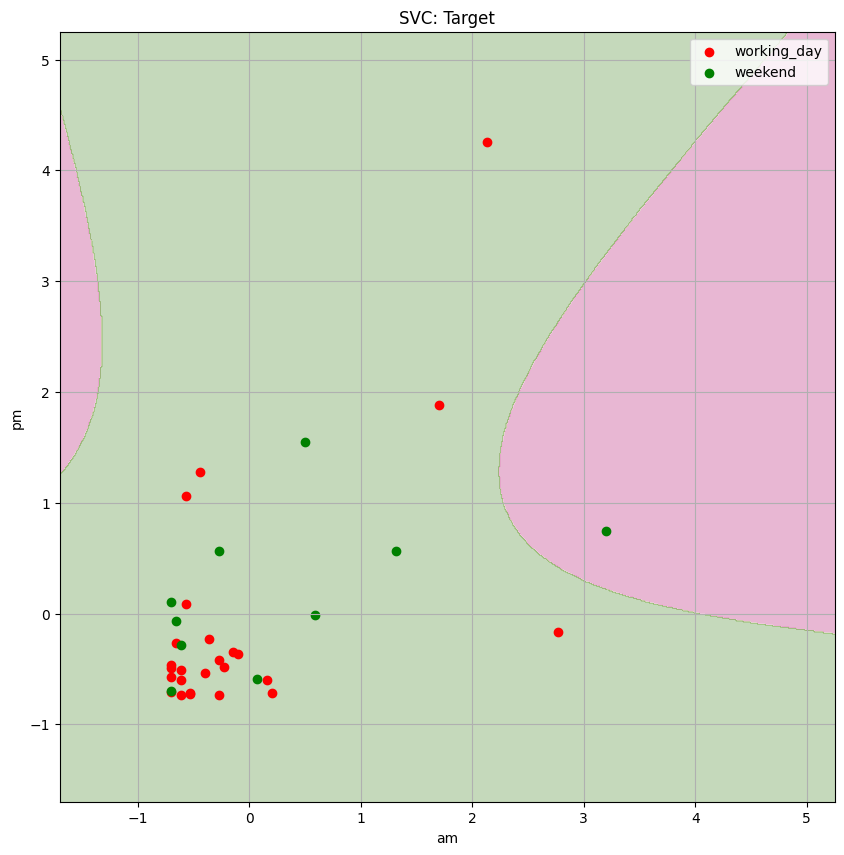

In [25]:
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='PiYG')
for target, color in [('working_day', 'red'), ('weekend', 'green')]:
    subset = df[df['target'] == target]
    plt.scatter(scaler.transform(subset[['am', 'pm']])[:, 0], scaler.transform(subset[['am', 'pm']])[:, 1], c=color, label=target)
plt.xlabel('am')
plt.ylabel('pm')
plt.title('SVC: Target')
plt.legend()
plt.grid(True)
plt.show()  

In [26]:
df['predict_svc'] = best_svc.predict(X_scaled)
df['predict_svc'] = df['predict_svc'].apply(lambda x: 'weekend' if x == 1 else 'working_day')

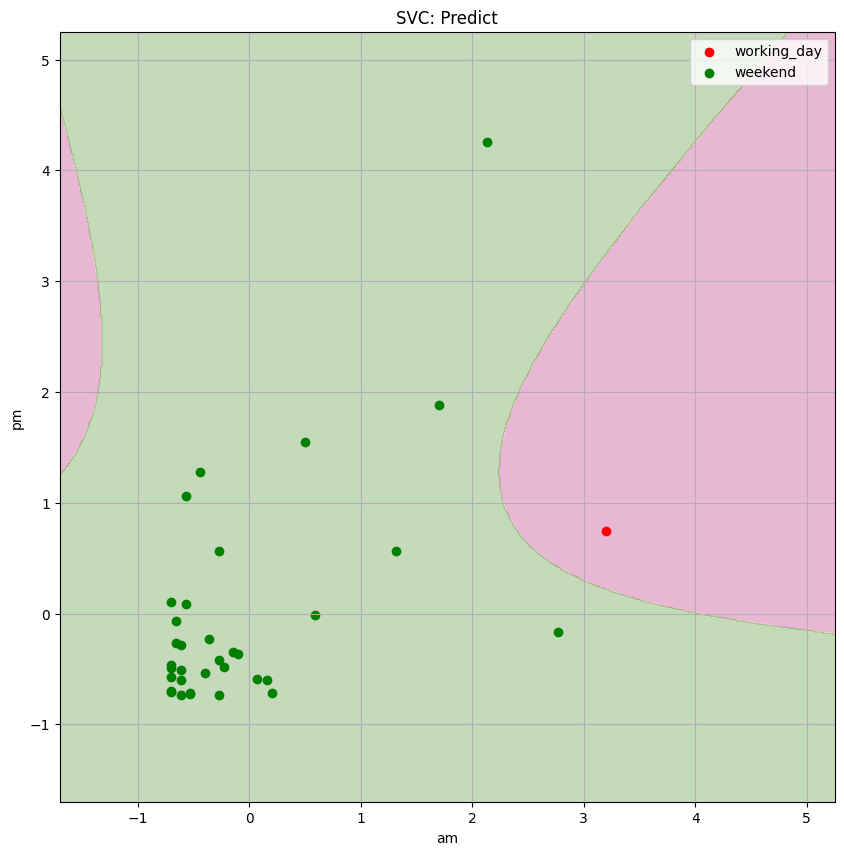

In [27]:
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='PiYG')
for predict, color in [('working_day', 'red'), ('weekend', 'green')]:
    subset = df[df['predict_svc'] == predict]
    plt.scatter(scaler.transform(subset[['am', 'pm']])[:, 0], scaler.transform(subset[['am', 'pm']])[:, 1], c=color, label=predict)
plt.xlabel('am')
plt.ylabel('pm')
plt.title('SVC: Predict')
plt.legend()
plt.grid(True)
plt.show()  

## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_scaled, y)
y_pred = tree.predict(X_scaled)

In [30]:
accuracy = accuracy_score(y, y_pred)
accuracy

0.9428571428571428

In [31]:
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

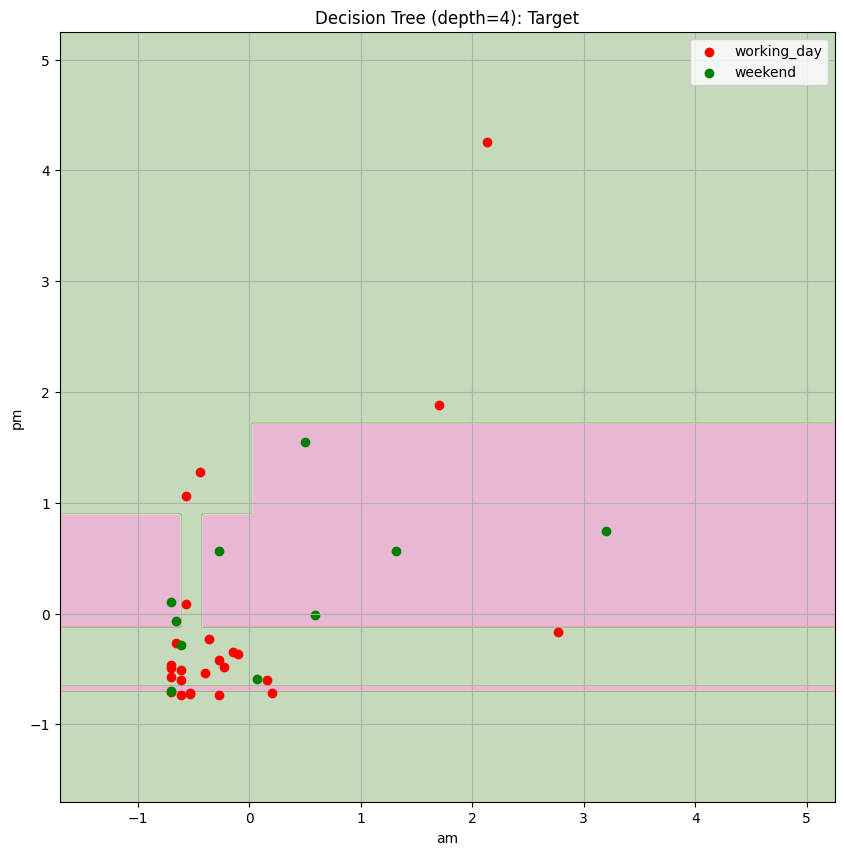

In [32]:
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='PiYG')
for target, color in [('working_day', 'red'), ('weekend', 'green')]:
    subset = df[df['target'] == target]
    plt.scatter(scaler.transform(subset[['am', 'pm']])[:, 0], scaler.transform(subset[['am', 'pm']])[:, 1], c=color, label=target)
plt.xlabel('am')
plt.ylabel('pm')
plt.title(f'Decision Tree (depth=4): Target')
plt.legend()
plt.grid(True)
plt.show()  

In [33]:
df['predict_tree'] = tree.predict(X_scaled)
df['predict_tree'] = df['predict_tree'].apply(lambda x: 'weekend' if x == 1 else 'working_day')

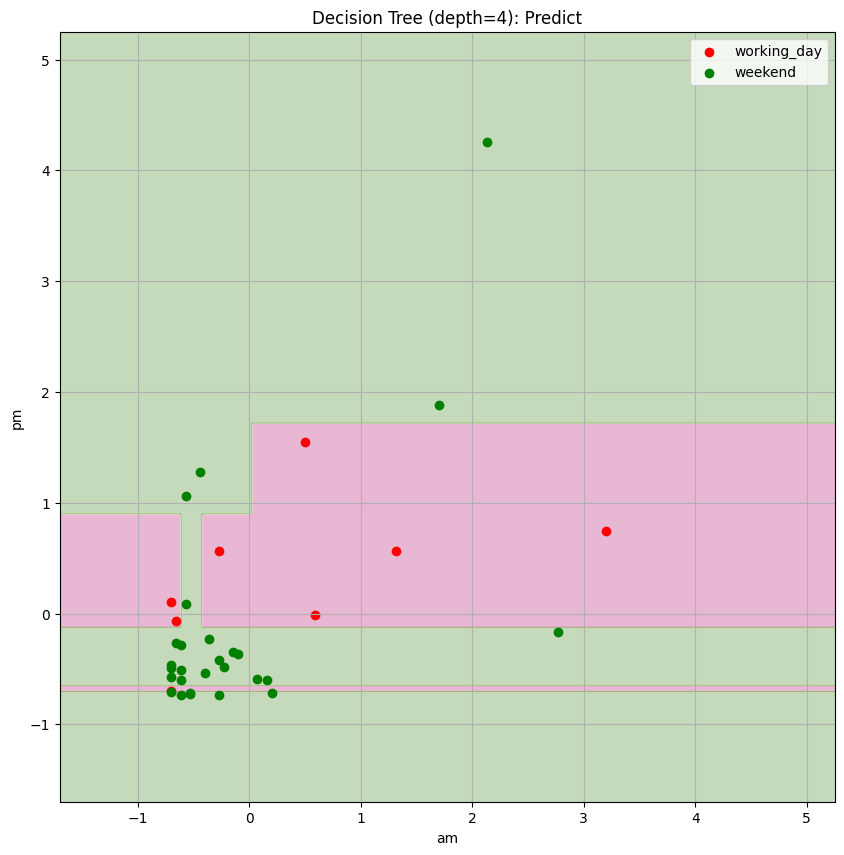

In [34]:
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='PiYG')
for predict, color in [('working_day', 'red'), ('weekend', 'green')]:
    subset = df[df['predict_tree'] == predict]
    plt.scatter(scaler.transform(subset[['am', 'pm']])[:, 0], scaler.transform(subset[['am', 'pm']])[:, 1], c=color, label=predict)
plt.xlabel('am')
plt.ylabel('pm')
plt.title(f'Decision Tree (depth=4): Predict')
plt.legend()
plt.grid(True)
plt.show()  

In [35]:
from sklearn.tree import plot_tree

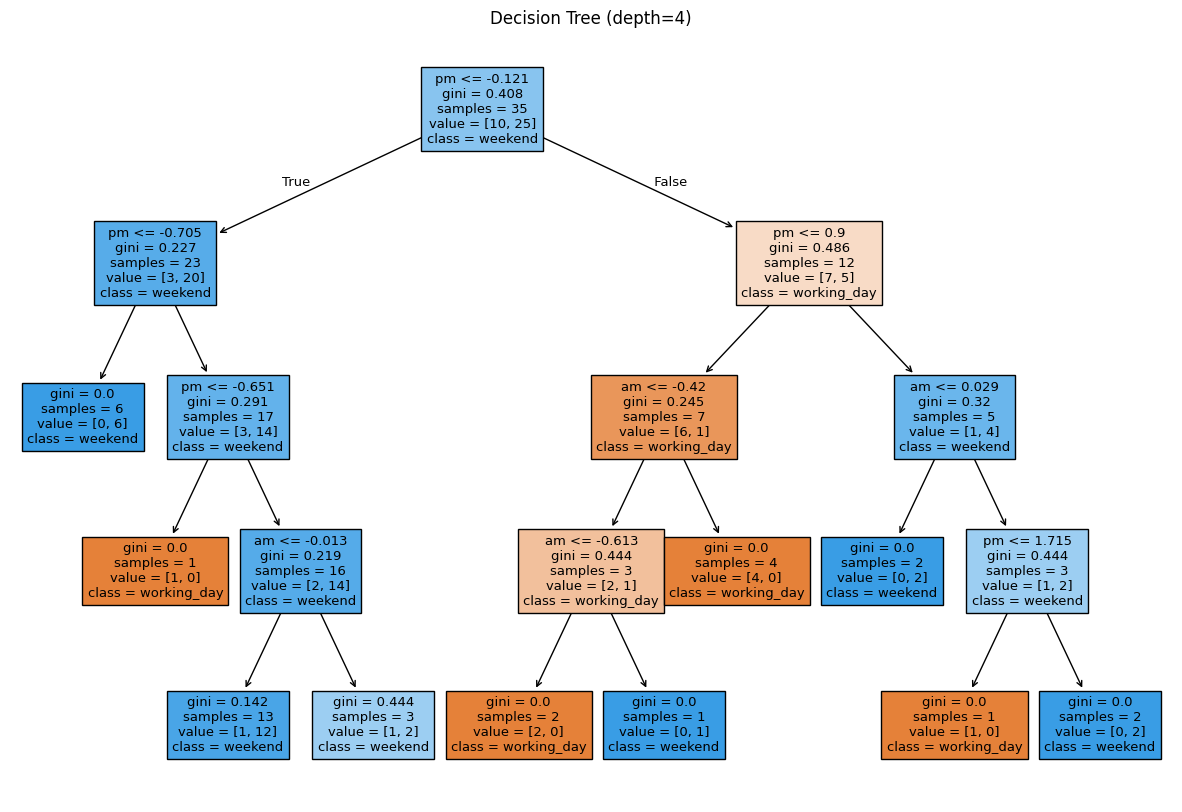

In [36]:
plt.figure(figsize=(15, 10))
plot_tree(tree, feature_names=['am', 'pm'], class_names=['working_day', 'weekend'], filled=True)
plt.title(f'Decision Tree (depth=4)')
plt.show()

In [37]:
depths = [2, 4, 6, 8]
best_accuracy = 0
best_depth = None
best_tree = None

In [38]:
for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_scaled, y)
    y_pred = tree.predict(X_scaled)
    accuracy = accuracy_score(y, y_pred)
    print(f'Decision Tree accuracy (max_depth={depth}): {accuracy}')
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth
        best_tree = tree

Decision Tree accuracy (max_depth=2): 0.8571428571428571
Decision Tree accuracy (max_depth=4): 0.9428571428571428
Decision Tree accuracy (max_depth=6): 1.0
Decision Tree accuracy (max_depth=8): 1.0


In [39]:
print(f'Best max_depth: {best_depth} with accuracy: {best_accuracy}')

Best max_depth: 6 with accuracy: 1.0


In [40]:
Z = best_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

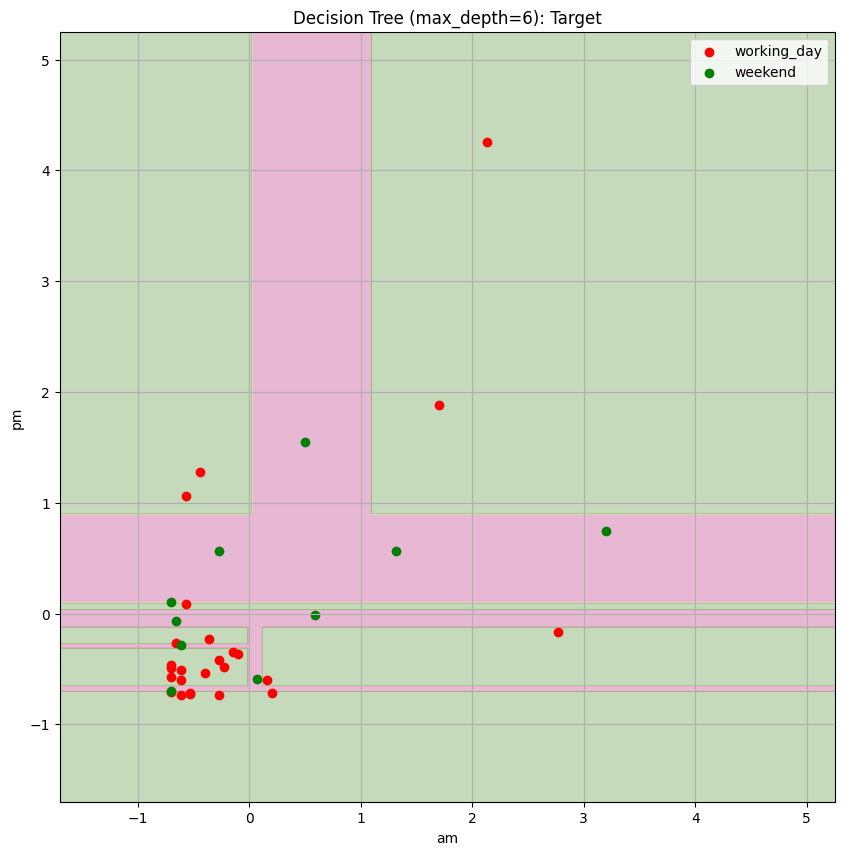

In [41]:
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='PiYG')
for target, color in [('working_day', 'red'), ('weekend', 'green')]:
    subset = df[df['target'] == target]
    plt.scatter(scaler.transform(subset[['am', 'pm']])[:, 0], scaler.transform(subset[['am', 'pm']])[:, 1], c=color, label=target)
plt.xlabel('am')
plt.ylabel('pm')
plt.title(f'Decision Tree (max_depth={best_depth}): Target')
plt.legend()
plt.grid(True)
plt.show()  

In [42]:
df['predict_tree'] = best_tree.predict(X_scaled)
df['predict_tree'] = df['predict_tree'].apply(lambda x: 'weekend' if x == 1 else 'working_day')

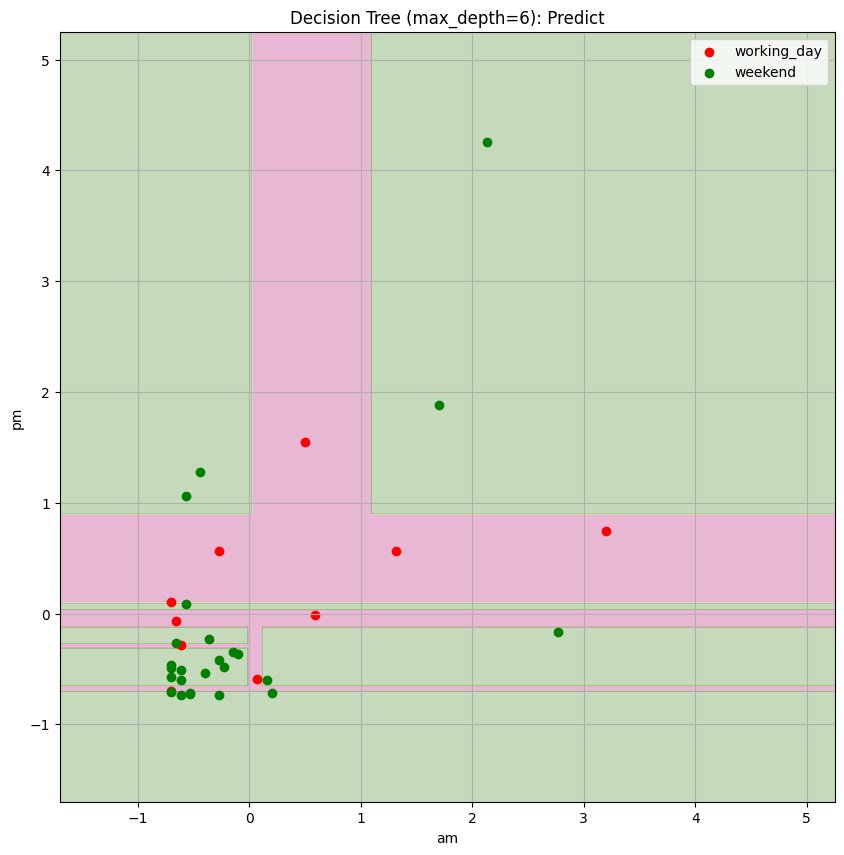

In [43]:
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='PiYG')
for predict, color in [('working_day', 'red'), ('weekend', 'green')]:
    subset = df[df['predict_tree'] == predict]
    plt.scatter(scaler.transform(subset[['am', 'pm']])[:, 0], scaler.transform(subset[['am', 'pm']])[:, 1], c=color, label=predict)
plt.xlabel('am')
plt.ylabel('pm')
plt.title(f'Decision Tree (max_depth={best_depth}): Predict')
plt.legend()
plt.grid(True)
plt.show()  

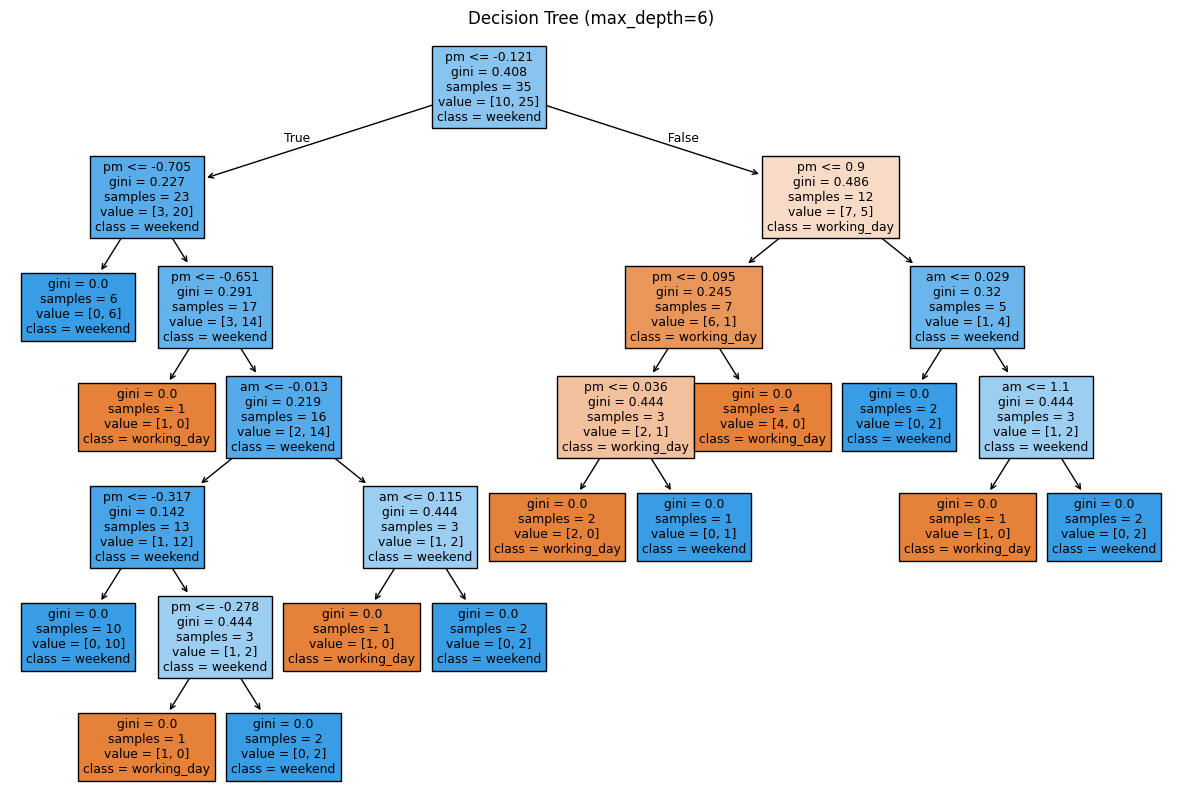

In [44]:
plt.figure(figsize=(15, 10))
from sklearn.tree import plot_tree
plot_tree(best_tree, feature_names=['am', 'pm'], class_names=['working_day', 'weekend'], filled=True)
plt.title(f'Decision Tree (max_depth={best_depth})')
plt.show()